In [7]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# Preprocess
data = pd.read_csv("../../data/01-modified-data/New_students_adaptability.csv")
data_cleaned = data.drop(columns=['Unnamed: 0'])

features = data_cleaned.drop(columns=['Adaptivity Level'])
target = data_cleaned['Adaptivity Level']
scaled_features = StandardScaler().fit_transform(features)

In [4]:
# Function to apply t-SNE with different perplexity values
def apply_tsne(perplexity):
    tsne = TSNE(n_components=2, perplexity=perplexity, n_iter=300)
    tsne_results = tsne.fit_transform(scaled_features)
    return tsne_results

In [5]:
# Try different perplexity values
perplexities = [5, 20, 30, 40, 50]
tsne_outputs = {perplexity: apply_tsne(perplexity) for perplexity in perplexities}

<function matplotlib.pyplot.show(close=None, block=None)>

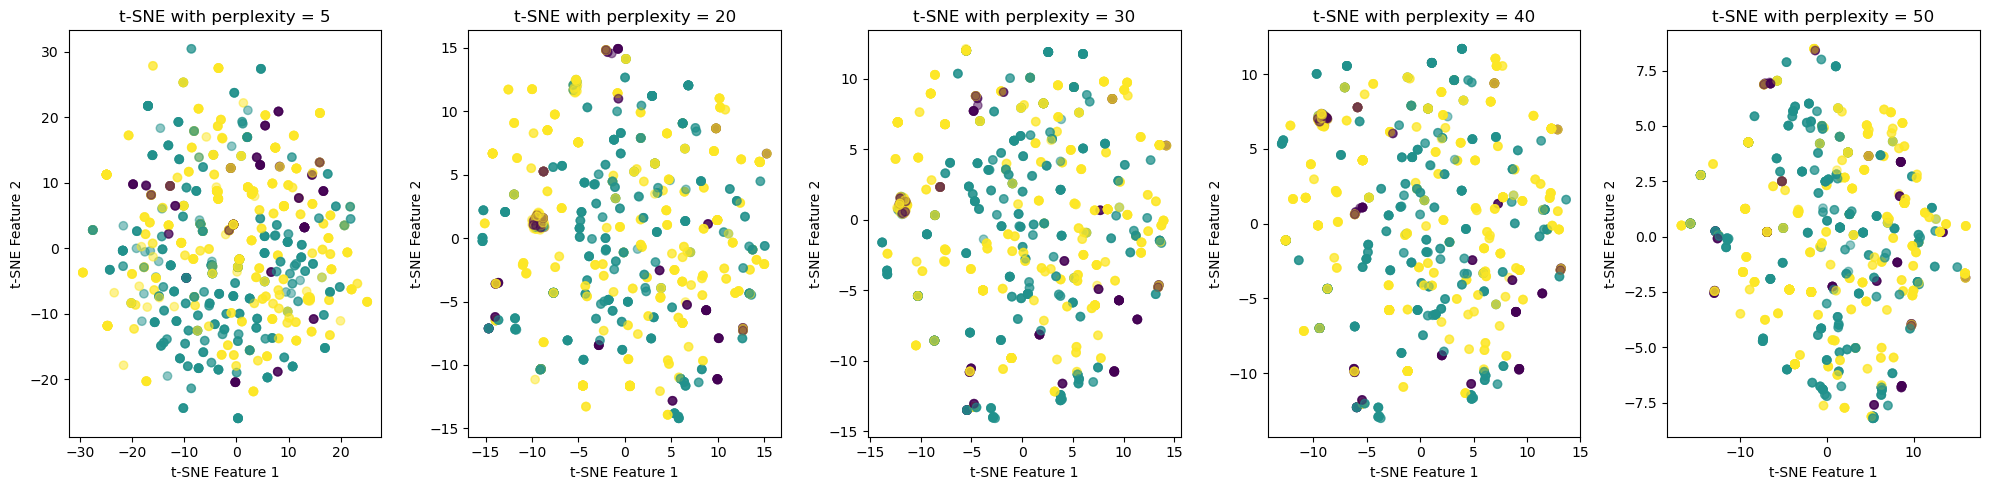

In [6]:
# Visualize the results
plt.figure(figsize=(20, 5))
for i, perplexity in enumerate(perplexities, 1):
    plt.subplot(1, 5, i)
    plt.scatter(tsne_outputs[perplexity][:, 0], tsne_outputs[perplexity][:, 1], 
                c=target, alpha=0.5, cmap='viridis')
    plt.title(f't-SNE with perplexity = {perplexity}')
    plt.xlabel('t-SNE Feature 1')
    plt.ylabel('t-SNE Feature 2')

plt.tight_layout()
plt.show

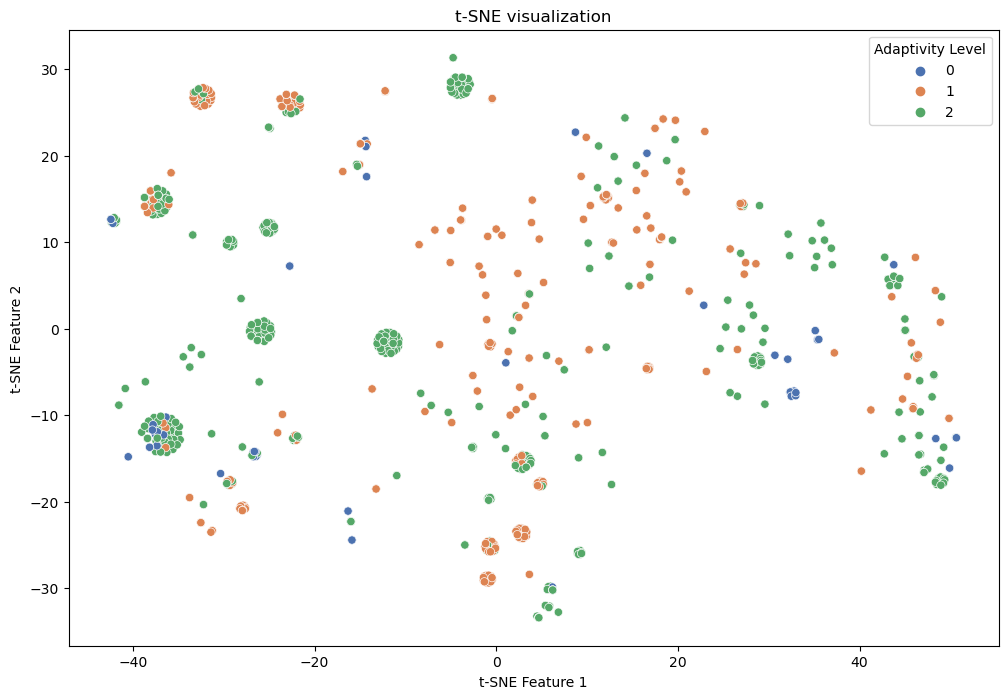

In [13]:
# Visualize results
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=35)
tsne_results = tsne.fit_transform(features)

# Make a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_results[:, 0], y=tsne_results[:, 1],
    hue=target, 
    palette=sns.color_palette("deep", len(np.unique(target))),
    legend="full"
)
plt.title('t-SNE visualization')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()
